### Modelagem

* Tarefas:
    * Buscar os melhores parametros para os seguintes modelos:
        * Random Forest
        * MLP
    * Selecionar o melhor modelo

In [55]:
import numpy as np
import pandas as pd

# scale
from sklearn.preprocessing import StandardScaler

# model selectiion
from sklearn.model_selection import StratifiedKFold, cross_val_score

# rf
from sklearn.ensemble import RandomForestClassifier
# mlp
from sklearn.neural_network import MLPClassifier

# metrics
from sklearn.metrics import accuracy_score, classification_report

# load/save models
from sklearn.externals import joblib

#### Plot Info

In [24]:
# plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 22})
fontdict = {'fontsize': 18,
           'weight' : 'bold'}
palette = palette=['green','orange','brown','blue', 'red', 'black', 'yellow']
sns.set()

### load data

In [54]:
# save Scaler
scaler = joblib.load('./data/preprocessamento/zscaler.pkl') 

# save models
X_ros = np.genfromtxt('./data/preprocessamento/X_rox', delimiter=' ')
y_ros = np.genfromtxt('./data/preprocessamento/y_rox', delimiter=' ')

X_smt = np.genfromtxt('./data/preprocessamento/X_smt', delimiter=' ')
y_smt = np.genfromtxt('./data/preprocessamento/y_smt', delimiter=' ')

### test data
X_test = pd.read_csv('./data/preprocessamento/X_test', header=None, sep=' ')
y_test =pd.read_csv('./data/preprocessamento/y_test', header=None, sep=' ')

### Selecionando a partição de cross validation

In [12]:
skf = StratifiedKFold(n_splits=10, shuffle=True)

### Random Forest

In [25]:
n_estimators = [10, 50, 100, 200, 500, 1000]
means = []
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n)
    score = cross_val_score(rf, X_ros, y_ros, cv=skf)
    means.append(score.mean())

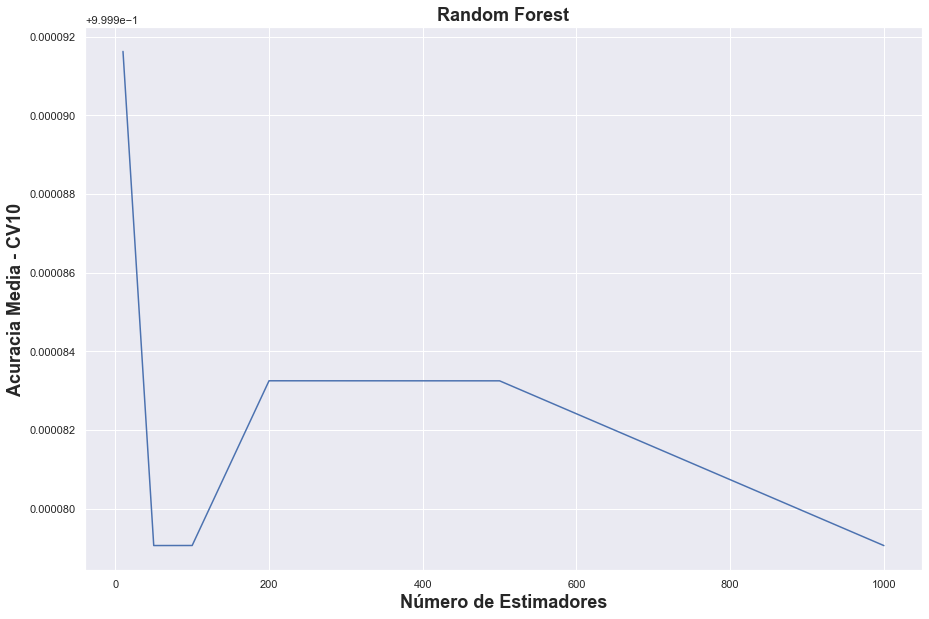

In [49]:
g = sns.lineplot(x=n_estimators, y=means)
g.set_title('Random Forest', fontdict=fontdict)
g.set_ylabel('Acuracia Media - CV10', fontdict=fontdict)
g.set_xlabel('Número de Estimadores', fontdict=fontdict);

Número de Estimadores 10: Obtive o melhor valor

### MLP

* Z-score normalization to train MLP

In [57]:
# first scale the data
X_train_scl, X_test_scl = scaler.transform(X_ros), scaler.transform(X_test)

In [62]:
hidden_layers = [(8), (16), (32), (50), (100),  (8, 4), (16, 8), (32, 16)]
means = []
for hl in hidden_layers:
    print("Start Layer: " + str(hl))
    mlp = MLPClassifier(hidden_layer_sizes=hl, activation='relu',
                                  solver='adam', alpha=0.0001, batch_size=16, 
                                  early_stopping=True)
    score = cross_val_score(mlp, X_train_scl, y_ros, cv=skf)
    means.append(score.mean())

Start Layer: 8
Start Layer: 16
Start Layer: 32
Start Layer: 50
Start Layer: 100
Start Layer: (8, 4)
Start Layer: (16, 8)
Start Layer: (32, 16)


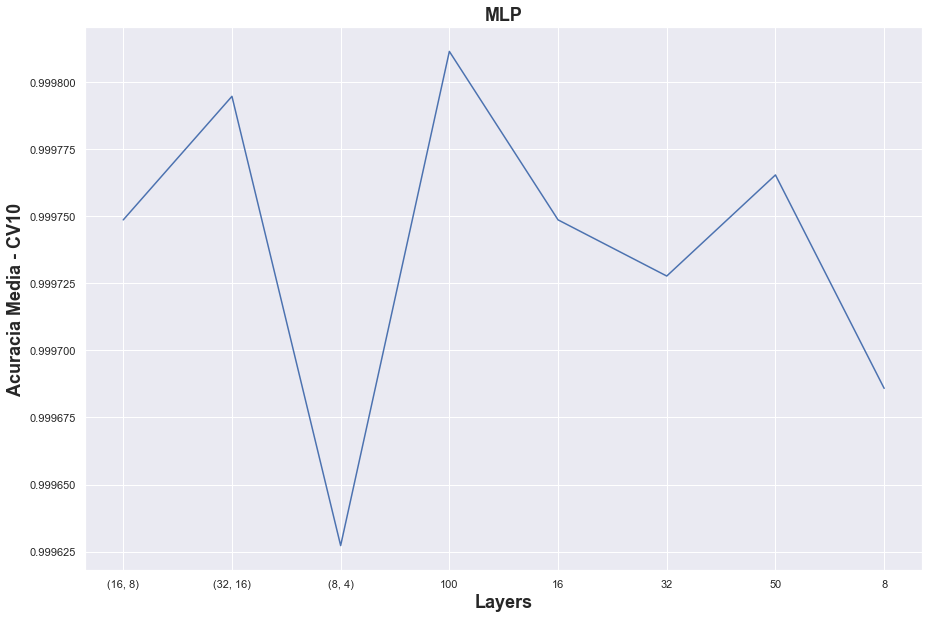

In [64]:
labels = list(map(str, hidden_layers))
g = sns.lineplot(x=label, y=means)
g.set_title('MLP', fontdict=fontdict)
g.set_ylabel('Acuracia Media - CV10', fontdict=fontdict)
g.set_xlabel('Layers', fontdict=fontdict);

### Resultado dos algoritmos na base de teste

In [67]:
# best params
mlp = MLPClassifier(hidden_layer_sizes=(100), activation='relu',
                                  solver='adam', alpha=0.0001, batch_size=16, 
                                  early_stopping=True)

rf = RandomForestClassifier(n_estimators=10)
# fit
rf.fit(X_ros, y_ros)
mlp.fit(X_train_scl, y_ros)

rf_pred = rf.predict(X_test)
mlp_pred = mlp.predict(X_test_scl)

In [68]:
print("RF Classification: ")
print(classification_report(rf_pred, y_test))

print("MLP Classification: ")
print(classification_report(mlp_pred, y_test))

RF Classification: 
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     11477
         2.0       0.92      1.00      0.96        12
         3.0       1.00      0.97      0.99        40
         4.0       1.00      1.00      1.00      2156
         5.0       1.00      1.00      1.00       809
         6.0       1.00      1.00      1.00         4
         7.0       1.00      1.00      1.00         2

    accuracy                           1.00     14500
   macro avg       0.99      1.00      0.99     14500
weighted avg       1.00      1.00      1.00     14500

MLP Classification: 
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     11471
         2.0       0.92      1.00      0.96        12
         3.0       0.97      0.86      0.92        44
         4.0       1.00      1.00      1.00      2156
         5.0       1.00      1.00      1.00       808
         6.0       1.00      1.00    